# Propser Loan Dataset Exploration
## by Moyinoluwa Sobowale

## Investigation Overview

> For the presentation, my goal is to explore the features of interest to discover the relationship between the borrowers and the loans disbursed to them. I will be investigating how each feature relates to one another and finally, how their correlation is affected by other variables in the dataset.


## Dataset Overview
> The dataset being used for this project is the Prosper loan Dataset provided by Udacity containing information of 113,937 loans with 81 variables(columns) on each loan. [Find column details here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

> Out of 81 loan features, I selected 20 columns and stored them in a dataframe called 'loan' for my analysis including 5 major columns of interest, which are: 'BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount', 'LoanOriginalDate', 'Term'.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Read the downloaded file (prosperLoanData.csv data) into a pandas dataframe called loan_data
loan_data = pd.read_csv("/Users/mac/Downloads/MOYIN/Moe/UDACITY - DATA ANALYST NANODEGREE/PROJECT 3/prosperLoanData.csv")

In [3]:
#create a dataframe containing the colomns of interest in the loan_data
columns = ['BorrowerAPR','BorrowerRate','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner','IncomeRange','IncomeVerifiable','StatedMonthlyIncome','DebtToIncomeRatio','LoanNumber','LoanOriginalAmount','LoanOriginationDate','LoanOriginationQuarter','Term','LoanStatus','ClosedDate','TotalProsperLoans']
new_loan = loan_data[columns]

In [4]:
#make a copy of the new_loan df
loan = new_loan.copy()

In [5]:
#Convert from string datatype to datetime format 
loan['LoanOriginationDate']= pd.to_datetime(loan['LoanOriginationDate'])
loan['ClosedDate']= pd.to_datetime(loan['ClosedDate'])

In [6]:
#create month and year columns from LoanOriginationDate & ClosedDate
loan['Loan_Month']= pd.DatetimeIndex(loan['LoanOriginationDate']).month
loan['Loan_Year']= pd.DatetimeIndex(loan['LoanOriginationDate']).year
loan['Closed_Month']= pd.DatetimeIndex(loan['ClosedDate']).month
loan['Closed_Year']= pd.DatetimeIndex(loan['ClosedDate']).year

In [7]:
#change Term, Loan_Month, Loan_Year, Closed_Month, Closed_Year to object datatype
loan['Term']=loan['Term'].astype(object)
loan['Loan_Month']= loan['Loan_Month'].astype(object)
loan['Loan_Year']= loan['Loan_Year'].astype(object)
loan['Closed_Month']= loan['Closed_Month'].astype(object)
loan['Closed_Year']= loan['Closed_Year'].astype(object)

In [8]:
#Convert from numerical datatype to string/object format
loan = loan.astype({"LoanNumber": str})

In [9]:
# create an empty list called 'borrower_state'
borrower_state = []
# create a loop which will iterate over all the rows in the column 'BorrowerState' and assign values in the list if the condition below is met
for x in loan['BorrowerState']:
    if x == 'CA': borrower_state.append('California')
    if x == 'TX': borrower_state.append('Texas')
    if x == 'NY': borrower_state.append('New York')
    if x == 'FL': borrower_state.append('Florida')
    if x == 'IL': borrower_state.append('Illinois')
    if x == 'GA': borrower_state.append('Georgia')
    if x == 'OH': borrower_state.append('Ohio')
    if x == 'MI': borrower_state.append('Michigan')
    if x == 'VA': borrower_state.append('Virginia')
    if x == 'NJ': borrower_state.append('New Jersey')
    if x == 'NC': borrower_state.append('North Carolina')
    if x == 'WA': borrower_state.append('Washington')
    if x == 'PA': borrower_state.append('Pennsylvania')
    if x == 'MD': borrower_state.append('Maryland')
    if x == 'MO': borrower_state.append('Missouri')
    if x == 'MN': borrower_state.append('Minnesota')
    if x == 'MA': borrower_state.append('Massachusetts')
    if x == 'CO': borrower_state.append('Colorado')
    if x == 'IN': borrower_state.append('Indiana')
    if x == 'AZ': borrower_state.append('Arizona')
    if x == 'WI': borrower_state.append('Wisconsin')
    if x == 'OR': borrower_state.append('Oregon')
    if x == 'TN': borrower_state.append('Tennessee')
    if x == 'AL': borrower_state.append('Alabama')
    if x == 'CT': borrower_state.append('Connecticut')
    if x == 'SC': borrower_state.append('South Carolina')
    if x == 'NV': borrower_state.append('Nevada')
    if x == 'KS': borrower_state.append('Kansas')
    if x == 'KY': borrower_state.append('Kentucky')
    if x == 'OK': borrower_state.append('Oklahoma')
    if x == 'LA': borrower_state.append('Louisiana')
    if x == 'UT': borrower_state.append('Utah')
    if x == 'AR': borrower_state.append('Arkansas')
    if x == 'MS': borrower_state.append('Mississippi')
    if x == 'NE': borrower_state.append('Nebraska')
    if x == 'ID': borrower_state.append('Idaho')
    if x == 'NH': borrower_state.append('New Hampshire')
    if x == 'NM': borrower_state.append('New Mexico')
    if x == 'RI': borrower_state.append('Rhode Island')
    if x == 'HI': borrower_state.append('Hawaii')
    if x == 'WV': borrower_state.append('West Virginia')
    if x == 'DC': borrower_state.append('District of Columbia')
    if x == 'MT': borrower_state.append('Montana')
    if x == 'DE': borrower_state.append('Delaware')
    if x == 'VT': borrower_state.append('Vermont')
    if x == 'AK': borrower_state.append('Alaska')
    if x == 'SD': borrower_state.append('South Dakota')
    if x == 'IA': borrower_state.append('Iowa')
    if x == 'WY': borrower_state.append('Wyomig')
    if x == 'ME': borrower_state.append('Maine')
    if x == 'ND': borrower_state.append('North Dakota')

#store the appended values in the 'borrower_state' pandas series into a new column called 'borrower_state' in the loan data frame  
                                
loan['borrower_state']= pd.Series(borrower_state)

In [10]:
#Rename the 'ListingCategory (numeric)' column to 'ListingCategory'
loan=loan.rename(columns={"ListingCategory (numeric)":"ListingCategory"})

In [11]:
# create an empty list called 'listing_category'
listing_category = []
# creat a loop which will iterate over all the rows in the 'ListingCategory' column and assign values in the list if the condition below is met
for x in loan['ListingCategory']:
    if x == 0: listing_category.append('Not available')
    if x == 1: listing_category.append('Debt Consolidation')
    if x == 2: listing_category.append('Home Improvement')
    if x == 3: listing_category.append('Business')
    if x == 4: listing_category.append('Personal Loan')
    if x == 5: listing_category.append('Student Use')
    if x == 6: listing_category.append('Auto')
    if x == 7: listing_category.append('Other')
    if x == 8: listing_category.append('Baby & Adoption')
    if x == 9: listing_category.append('Boat')
    if x == 10: listing_category.append('Cosmetic Procedure')
    if x == 11: listing_category.append('Engagement Ring')
    if x == 12: listing_category.append('Green Loans')
    if x == 13: listing_category.append('Household Expenses')
    if x == 14: listing_category.append('Large Purchases')
    if x == 15: listing_category.append('Medical/Dental')
    if x == 16: listing_category.append('Motorcycle')
    if x == 17: listing_category.append('RV')
    if x == 18: listing_category.append('Taxes')
    if x == 19: listing_category.append('Vacation')
    if x == 20: listing_category.append('Wedding Loans')
    
#store the append values in the 'listing_category' list into a new column called 'listing_category' in the loan data frame  
                                
loan['listing_category']= listing_category

In [12]:
#We can now proceed to drop both the former 'ListingCategory' and 'BorrowerState' columns
loan=loan.drop('ListingCategory',axis=1)
loan=loan.drop('BorrowerState',axis=1)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## DISTRIBUTION OF HOME OWNERS AMONG THE BORROWERS

> - A doughnut chart was created to gain insight into the distribution of home ownership accross the borrowers. 
> - We can see that 50.4% of the borrowers are homeowners while 49.6% of the borrowers are not. The distribution chart shows an almost even distribution between borrowers who own a home and those who do not.
> - This implies that home ownership might not have a significant effect on getting a loan from Prosper.

In [13]:
x = loan['IsBorrowerHomeowner'].value_counts(normalize = True)
homeowner = x * 100
homeowner

True     50.447177
False    49.552823
Name: IsBorrowerHomeowner, dtype: float64

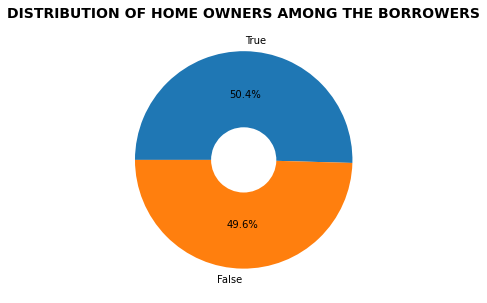

In [14]:
counts = homeowner
# set the fig size for ploting
plt.figure(figsize = [15, 5])
# plotting data on a doughnut chart
plt.pie(counts, labels = counts.index, autopct='%1.1f%%', startangle = 180,
        counterclock = False, wedgeprops = {'width' : 0.7})
plt.title("DISTRIBUTION OF HOME OWNERS AMONG THE BORROWERS", fontsize = 14, weight = ("bold"));

## DISTRIBUTION OF BORROWERS ACROSS THE 51 STATES

> A countplot (horizontal barchart) was created to show the distribution of the borrower states. 
> Carlifonia is the state with the highest number of borrowers, they are approximately 14717 counti.e over 14000 count. North Dakota is the state with the least number of borrowers.

''

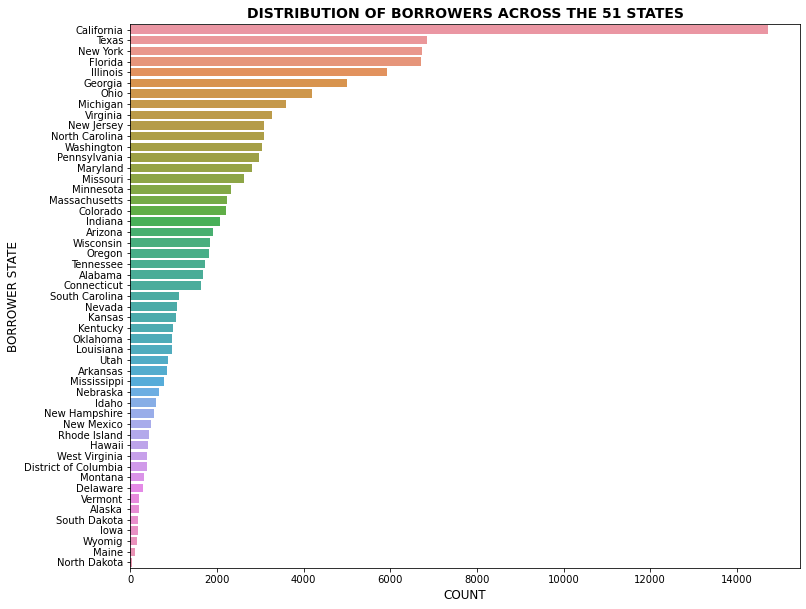

In [15]:
#create a countplot to show the distribution of the borrower States 
plt.figure(figsize = [12, 10])
order = loan['borrower_state'].value_counts().index
sb.countplot(data = loan, y = 'borrower_state', order = order)
plt.title("DISTRIBUTION OF BORROWERS ACROSS THE 51 STATES", fontsize = 14, weight = ("bold"))
plt.xlabel("COUNT", fontsize = 12)
plt.ylabel("BORROWER STATE", fontsize = 12)
;

## DISTRIBUTION OF BORROWERS' EMPLOYEMENT STATUS

> An horizontal countplot(barchart) was created to gain insight into the borrower's employment status. We can see that majority of the borrowers are employed i.e almost 70,000 of them.

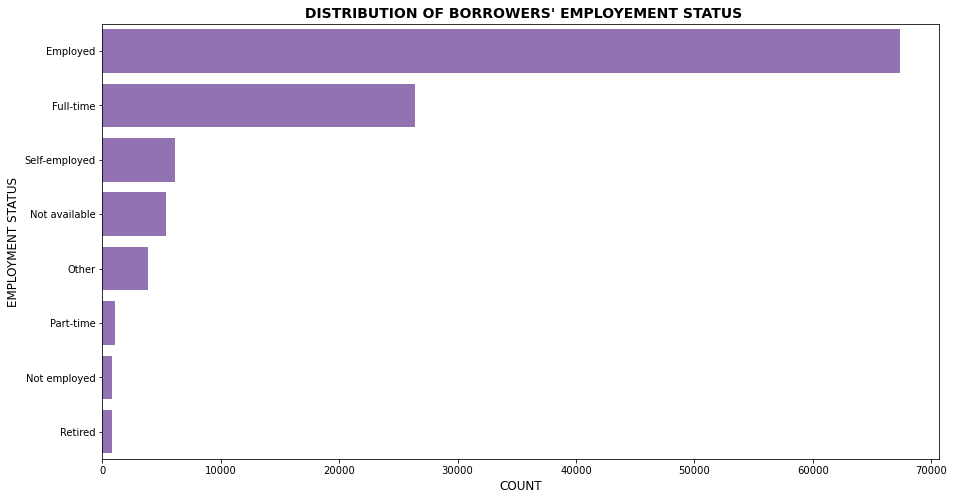

In [16]:
#create an horizontal countplot (barchart) to display the distribution of the borrowers' EmploymentStatus
plt.figure(figsize = [15, 8])
color = sb.color_palette()[4]
order = loan['EmploymentStatus'].value_counts().index
sb.countplot(data = loan, y = 'EmploymentStatus', color = color, order = order)
plt.title(" DISTRIBUTION OF BORROWERS' EMPLOYEMENT STATUS", fontsize = 14, weight = ("bold"))
plt.xlabel("COUNT", fontsize = 12)
plt.ylabel("EMPLOYMENT STATUS", fontsize = 12);

## DISTRIBUTION OF BORROWERS' INCOME RANGE

> An horizontal countplot (barchart) was created to gain insight into the borrower's income range. The distribution shows us that majority of the borrowers are of the income range 25,000 - 74,999 dollars range

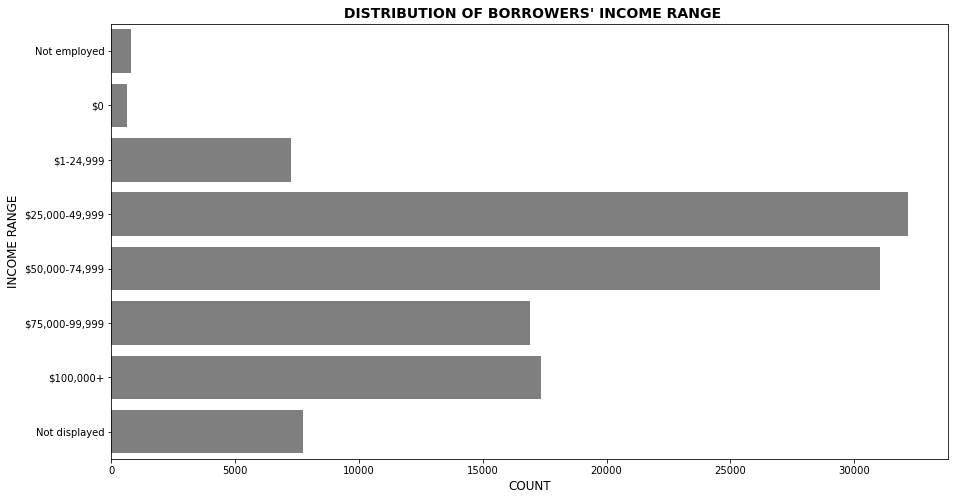

In [17]:
#create an horizontal countplot (barchart) to display the distribution of the borrowers' Income range
plt.figure(figsize = [15, 8])
color = sb.color_palette()[7]
order = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']
sb.countplot(data= loan, y = 'IncomeRange', color = color, order = order)
plt.title(" DISTRIBUTION OF BORROWERS' INCOME RANGE", fontsize = 14, weight = ("bold"))
plt.xlabel("COUNT", fontsize = 12)
plt.ylabel("INCOME RANGE", fontsize = 12);

## DISTRIBUTION OF LOAN YEARS

> An horizontal countplot (barchart) was created to gain insight into the distribution of the loan years. This distribution shows us that majority of the loans were taken in 2013 (almost 35,000 loans), no loan was taken in 2005.

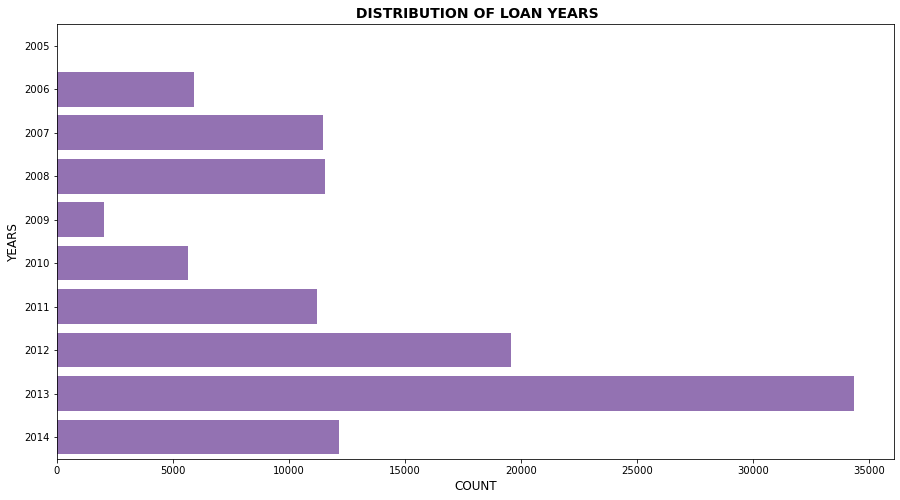

In [18]:
#create an horizontal countplot (barchart) to display the distribution of the loan years
plt.figure(figsize = [15, 8])
color = sb.color_palette()[4]
sb.countplot(data = loan, y = 'Loan_Year', color = color)
plt.title(" DISTRIBUTION OF LOAN YEARS", fontsize = 14, weight = ("bold"))
plt.xlabel("COUNT", fontsize = 12)
plt.ylabel("YEARS", fontsize = 12);

## RELATIONSHIP BETWEEN EMPLOYMENT STATUS AND HOME OWNERSHIP

> The barchart shows us that majority of the employed borrowers are homeowners

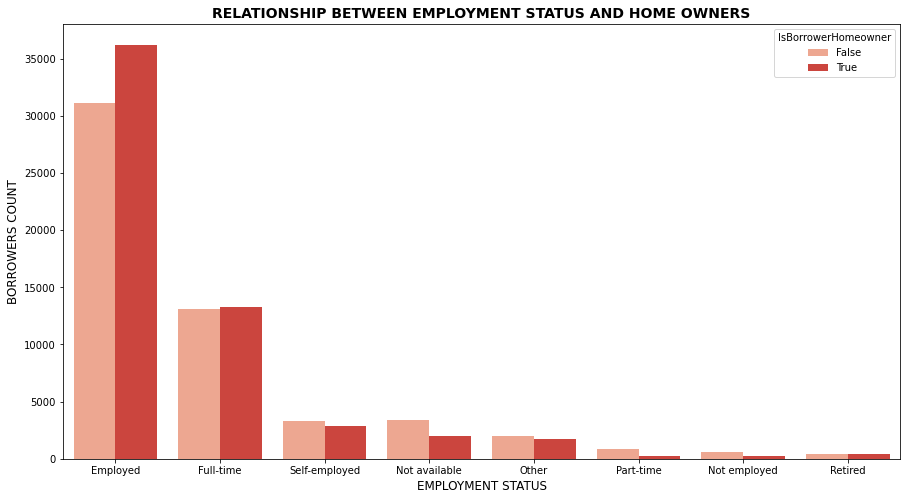

In [19]:
plt.figure(figsize = [15, 8])
order = loan['EmploymentStatus'].value_counts().index
sb.countplot(data= loan, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', order = order, palette = 'Reds')
plt.title("RELATIONSHIP BETWEEN EMPLOYMENT STATUS AND HOME OWNERS", fontsize = 14, weight = ("bold"))
plt.xlabel("EMPLOYMENT STATUS", fontsize = 12)
plt.ylabel("BORROWERS COUNT", fontsize = 12);

## RELATIONSHIP BETWEEN EMPLOYMENT STATUS AND LOAN TERM

> The chart shows us that the borrowers with full time employment status tend to take loans with term duration of 36 months. Majority of the employed borrowers tend to take loans with 36 months duration.

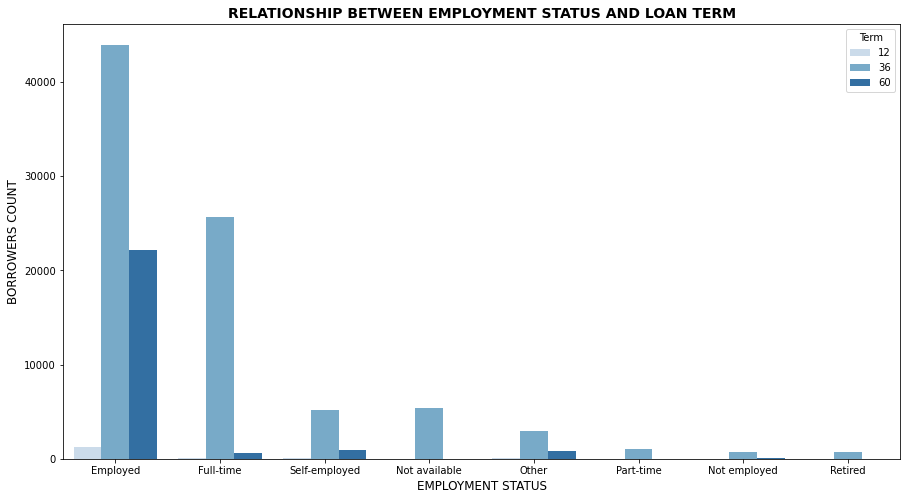

In [20]:
plt.figure(figsize = [15, 8])
order = loan['EmploymentStatus'].value_counts().index
sb.countplot(data= loan, x = 'EmploymentStatus', hue = 'Term', order = order, palette = 'Blues')
plt.title("RELATIONSHIP BETWEEN EMPLOYMENT STATUS AND LOAN TERM", fontsize = 14, weight = ("bold"))
plt.xlabel("EMPLOYMENT STATUS", fontsize = 12)
plt.ylabel("BORROWERS COUNT", fontsize = 12);

## CORRELATION BETWEEN BORROWER APR, BORROWER RATE, LOAN AMOUNT AND STATED MONTHLY INCOME

> The heatmap tells us the following:
> - The correlation coefficient indicates that the borrower rate and borrower APR a have strong positive correlation meaning that they are directly proportional i.e the rise in one vale leads to the rise in the other. 
> - We can also see that the Loan original amount has a weak correlation with the borrowers rate and borrower APR. This means that the borrower rate and borrower APR are negatively correlated with the loan original amount. Therefore, the higher the loan amount, the lower the Borrower Rate and Borrower APR. 
> - The loan original amount is positively correlated with the stated monthly income. Therefore, the higher the stated monthly income, the higher the original loan amount received by the borrower.

In [21]:
#store all the numerical variables in a variable called 'num_vars'
num_vars = [ 'BorrowerAPR','BorrowerRate','LoanOriginalAmount','StatedMonthlyIncome']

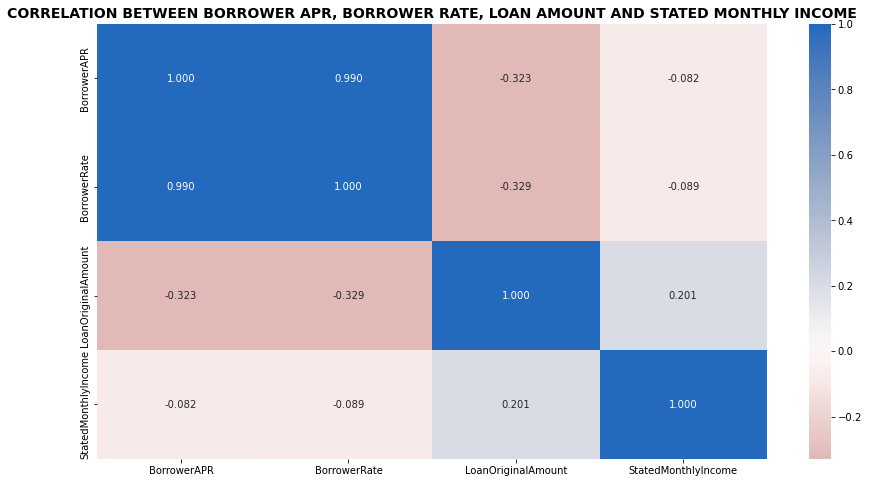

In [22]:
# creat a heatmap plot to show correlation between the numerical variables
plt.figure(figsize = [15, 8])
sb.heatmap(loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('CORRELATION BETWEEN BORROWER APR, BORROWER RATE, LOAN AMOUNT AND STATED MONTHLY INCOME', fontsize=14, weight=("bold"));

## RELATIONSHIP BETWEEN INCOME RANGE AND LOAN AMOUNT BASED ON INCOME VERIFIABLE

> The boxplot shows us that borrowers who earn 100,000+ dollars and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers with verified incomes seem to get higher loan amounts. Therefore, having verifiable income seems to be crucial when giving out loans to borrowers.

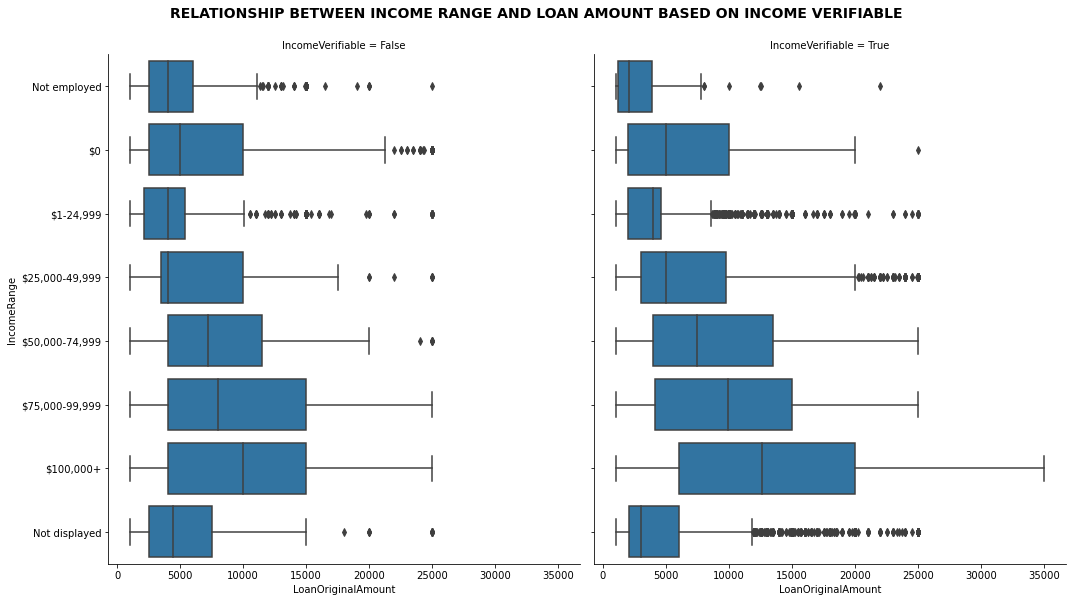

In [23]:
#Create a boxplot to show the effect of verifiable income on the relationship between loan original amount and income range
order = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']
box = sb.FacetGrid(data = loan, col = 'IncomeVerifiable', height = 5)
box.fig.set_size_inches(15,8)
box.map(sb.boxplot, 'LoanOriginalAmount', 'IncomeRange', order = order)
plt.suptitle("RELATIONSHIP BETWEEN INCOME RANGE AND LOAN AMOUNT BASED ON INCOME VERIFIABLE", fontsize = 14, weight = ("bold"), y = 1.04);

In [24]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 861653 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/Users/mac/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/Users/mac/opt/anaconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/mac/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/Users/mac/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "/Users/mac/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 541, in convert_notebooks
    self.convert